# Bitácora para describir archivos con secuencias después del ensamblaje

In [1]:
cd ~/Desktop/data/fasta/

C:\Users\SalaD26\Desktop\data\fasta


In [2]:
from Bio import SeqIO
from pandas import DataFrame
import pandas as pd
from Bio.SeqUtils import GC
import pylab as pl
from pylab import *

In [3]:
def cpg(secuencia):
    g= secuencia.count("G")
    c= secuencia.count("C")
    cg= secuencia.count("CG")
    lar= len(secuencia)
    cpG=0
    try:
        g*c==0
    except:
        cpG=0
    else:
        if g == 0 or c== 0:
            cpG =0
        else:
            cpG=(round(cg/(g*c)*(lar**2/(lar-1)) ,8))
    return (cpG)

In [4]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El número de serie del volumen es: 4C69-5113

 Directorio de C:\Users\SalaD26\Desktop\data\fasta

26/07/2018  10:21 a. m.    <DIR>          .
26/07/2018  10:21 a. m.    <DIR>          ..
26/07/2018  10:21 a. m.    <DIR>          img
10/01/2018  05:23 p. m.             7,220 secuencias.fasta
23/07/2018  09:27 p. m.             6,032 secuencias_anotadas.aln
23/07/2018  09:27 p. m.               389 secuencias_anotadas.dnd
24/07/2018  09:26 a. m.             4,323 secuencias_anotadas.fasta
24/07/2018  09:30 a. m.             4,836 secuencias_anotadas.masx
24/07/2018  09:29 a. m.             4,485 secuencias_anotadas.meg
23/07/2018  09:31 p. m.             4,843 secuencias_completas.aln
23/07/2018  09:31 p. m.               253 secuencias_completas.dnd
10/01/2018  10:06 p. m.             3,423 secuencias_completas.fas
24/07/2018  08:05 p. m.               254 secuencias_especies.csv
              10 archivos         36,058 bytes
              

In [5]:
f = open('secuencias_anotadas.fasta', 'r')
sizes = [(rec.name, len(rec), round(GC(rec.seq),4), cpg(rec.seq)) for rec in SeqIO.parse(f, "fasta")]
sizes = DataFrame(sizes,columns= ["contigs", "length", "GC", "CpG"])
sizes.head(2)

,contigs,length,GC,CpG
0,Nav1_2_B_halotolerans,333,52.2523,0.941738
1,Nav1_8_B_aquimaris,332,53.0120,1.033235


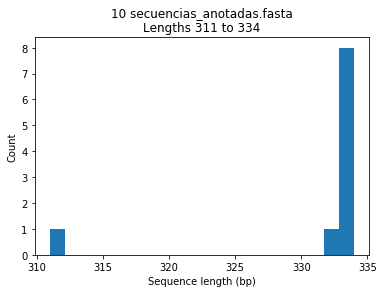

In [6]:
pl.hist(sizes['length'], bins=20)
pl.title("%i secuencias_anotadas.fasta\nLengths %i to %i" \
            % (len(sizes["length"]),min(sizes['length']),max(sizes['length'])))
pl.xlabel("Sequence length (bp)")
pl.ylabel("Count")
#pl.legend().set_visible(False)
pl.show()

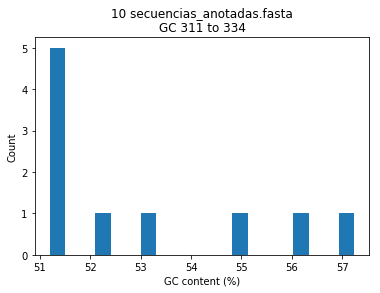

In [7]:
pl.hist(sizes['GC'], bins=20)
pl.title("%i secuencias_anotadas.fasta\nGC %i to %i" \
            % (len(sizes["length"]),min(sizes['length']),max(sizes['length'])))
pl.xlabel("GC content (%)")
pl.ylabel("Count")
#pl.legend().set_visible(False)
pl.show()

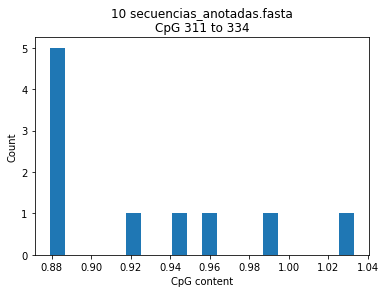

In [8]:
pl.hist(sizes['CpG'], bins=20)
pl.title("%i secuencias_anotadas.fasta\nCpG %i to %i" \
            % (len(sizes["length"]),min(sizes['length']),max(sizes['length'])))
pl.xlabel("CpG content")
pl.ylabel("Count")
#pl.legend().set_visible(False)
pl.show()